# Аналитика в бизнес-показателей

<p>Необходимо оптимизировать маркетинговые затраты.</p>

## Шаг 1. Загрузка данных и подготовка их к анализу

Мы имеем 3 таблицы с данными о пользователях:
1. visits_log.csv - лог сервера с информацией о посещениях сайта;
2. orders_log.csv - информация о заказах;
3. costs.csv - информация о затратах на маркетинг.

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [2]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Переименуем названия столбцов для удобства - все с маленькой буквы, и заменим тим данных в столбцах `end_ts` и `start_ts`.

In [5]:
visits.set_axis(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], axis='columns', inplace=True)

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Столбцы переименованы. Тип данных заменен. Посмотрим, есть ли в таблице дубликаты данных.

In [8]:
visits.duplicated().sum()

0

Дубликатов в таблице нет. Посмотрим, какие платформы и какие источники есть в таблице. Для этого выведем их значение и количество.

In [9]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [10]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Для расчета метрик DAU, WAU и MAU нам понадобятся столбцы, которые содержат в себе значения дней, недель и месяцев даты сессии пользователя.

In [11]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['date'] = visits['start_ts'].dt.date
visits['weekday'] = visits['start_ts'].dt.weekday
visits['year_month'] = visits['start_ts'].dt.to_period('M')
visits['year_month_week'] = visits['start_ts'].dt.to_period('W')



In [12]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,weekday,year_month,year_month_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2,2017-12,2017-12-18/2017-12-24
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,0,2018-02,2018-02-19/2018-02-25
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,5,2017-07,2017-06-26/2017-07-02
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,6,2018-05,2018-05-14/2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2,2017-12,2017-12-25/2017-12-31


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
device             359400 non-null object
end_ts             359400 non-null datetime64[ns]
source_id          359400 non-null int64
start_ts           359400 non-null datetime64[ns]
uid                359400 non-null uint64
year               359400 non-null int64
month              359400 non-null int64
week               359400 non-null int64
date               359400 non-null object
weekday            359400 non-null int64
year_month         359400 non-null period[M]
year_month_week    359400 non-null period[W-SUN]
dtypes: datetime64[ns](2), int64(5), object(2), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 32.9+ MB


In [14]:
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
device             359400 non-null object
end_ts             359400 non-null datetime64[ns]
source_id          359400 non-null int64
start_ts           359400 non-null datetime64[ns]
uid                359400 non-null uint64
year               359400 non-null int64
month              359400 non-null int64
week               359400 non-null int64
date               359400 non-null datetime64[ns]
weekday            359400 non-null int64
year_month         359400 non-null period[M]
year_month_week    359400 non-null period[W-SUN]
dtypes: datetime64[ns](3), int64(5), object(1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 32.9+ MB


Обработали таблицу `visits` для последующей работы с ней. 

Посмотрим таблицу `orders` и оптимизируем ее для дальнейшей работы.

In [15]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [17]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


В данной таблице 3 столбца, которые содержат дату совершения покупки, сумму покупки и уникальный идентификатор пользователя. Преобразуем столбце, содержащий дату, к нужному типу данных, а также переименуем названия столбцов для удобства работы с ними. Посмотрим, есть ли в таблице дубликаты.

In [18]:
orders.set_axis(['buy_ts', 'revenue','uid'], axis='columns', inplace=True)

In [19]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [21]:
orders.duplicated().sum()

0

Таблица `orders` готова. Посмотрим таблицу `costs` и оптимизируем ее для дальнейшей работы.

In [22]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [24]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


Данная таблица содержит 3 столбца: источник рекламы, дата затрат и сумма затрат в конкретную дату на определенный источник. Приведем значения столбца, содержащего дату, к нудному типу данных. Посмотрим, есть ли в таблице дубликаты, а также посмотрим, какое количество источников имеется в таблице.

In [25]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [26]:
costs.duplicated().sum()

0

In [27]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Таблица `costs` готова для работы.

### Вывод

Мы загрузили данные, которые содержатся во всех доступных нам таблицах. Посмотрели типы данных, заменили типы там, где это было необходимо. Переименовали столбцы, чтобы в дальнейшем с ними было удобнее работать. В таблицу `visits` добавили столбцы, которые необходимы будут для подсчета метрик DAU, WAU и MAU. Убедились, что в таблицах нет дубликатов данных. Кроме того посмотрели, какие платформы использовали пользователи при посещении Яндекс.Афиши (touch и desktop) - 73% desktop, а также, из каких источников пользователи приходили. Получили информацию, что пользователи приходили из 9 источников, в то время как компания платила только за 7 источников. Возможно 2 источника без затрат - это бесплатные источники, из которых приходили пользователи, например - органический поиск или прямой заход на сайт.

## Шаг 2. Построение отчётов и подсчёт метрик

Необходимо отобразить на графиках, как метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

### 2.1. Продукт
1. Сколько людей пользуются в день, неделю, месяц?
2. Сколько сессий в день?
3. Сколько длится одна сессия?
4. Как часто люди возвращаются?

<b>1. Посмотрим, сколько людей пользуются в день, неделю, месяц.</b>
<p>Для того, чтобы ответить на вопрос, сколько людей пользуются в день, неделю, месяц, необходимо найти среднее DAU, WAU и MAU, а также посмотреть на изменение этих метрик в динамике и в разрезе по источникам трафика.</p>

In [28]:
mau_total = visits.groupby(['year','month']).agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['year','week']).agg({'uid': 'nunique'}).mean()
dau_total = visits.groupby(['date']).agg({'uid': 'nunique'}).mean()

In [29]:
mau_total

uid    23228.416667
dtype: float64

In [30]:
wau_total

uid    5716.245283
dtype: float64

In [31]:
dau_total

uid    907.991758
dtype: float64

В месяц сервис посещают 23,2 тыс. пользователей, в неделю - 5,7 тыс., ежедневно - 908 пользователей. 

Оценим регулярность посещений и стабильность пользовательской базы, рассчитав sticky_factor.

In [32]:
sticky_factor_wau = dau_total / wau_total * 100
sticky_factor_mau = dau_total / mau_total * 100
print(sticky_factor_wau)
print(sticky_factor_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


Как видим, пользователи не слишком регулярно используют сервис. Необходимо работать над удержанием аудитории.

Посмотрим динамику изменения DAU, WAU и MAU по месяцам в разрезе по платформам.

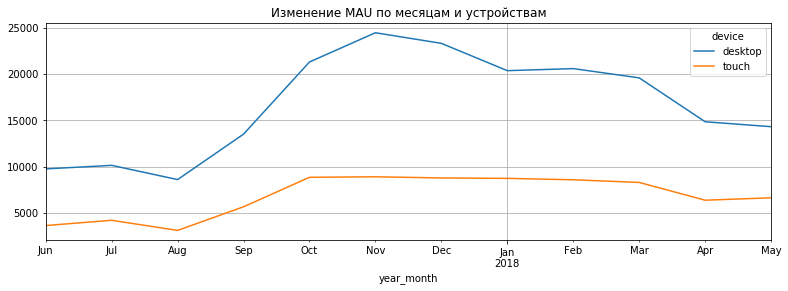

In [33]:
users_by_month = visits.pivot_table(index='year_month', columns='device', values='uid', aggfunc='nunique')
ubm = users_by_month.plot(figsize=(13,4), grid=True, title = 'Изменение MAU по месяцам и устройствам')
ubm.set_xlabel = 'Месяц'
ubm.set_ylabel = 'MAU'

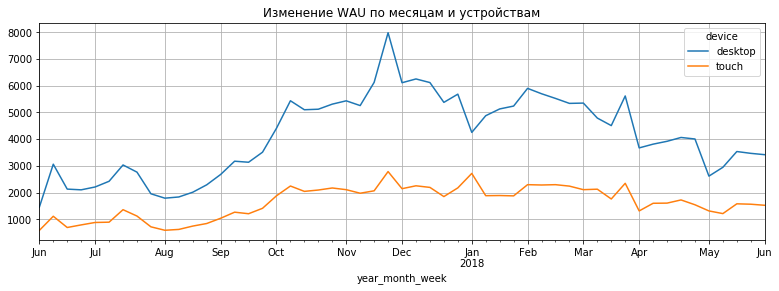

In [34]:
users_by_week = visits.pivot_table(index='year_month_week', columns='device', values='uid', aggfunc='nunique')
ubw = users_by_week.plot(figsize=(13,4), grid=True, title = 'Изменение WAU по месяцам и устройствам')
ubw.set_xlabel = 'Месяц'
ubw.set_ylabel = 'WAU'

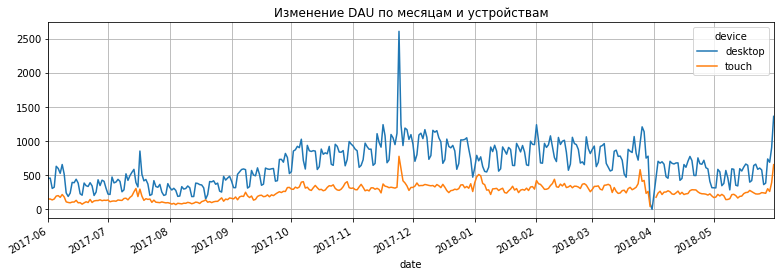

In [35]:
users_by_date = visits.pivot_table(index='date', columns='device', values='uid', aggfunc='nunique')
ubd = users_by_date.plot(figsize=(13,4), grid=True, title = 'Изменение DAU по месяцам и устройствам')
ubd.set_xlabel = 'Месяц'
ubd.set_ylabel = 'DAU'

Посмотрим графики изменения DAU в динамике по дням в разрезе по платформам и источникам.

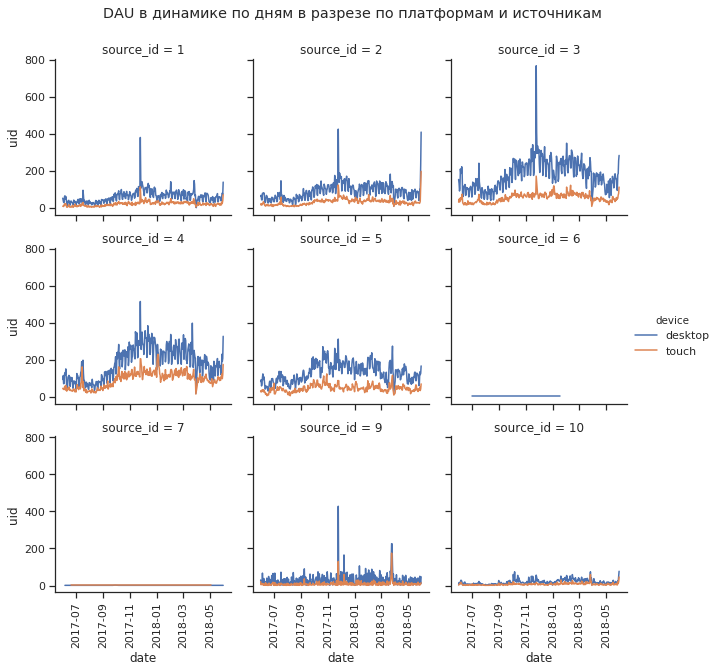

In [36]:
dau_grouped = visits.groupby(by =['date','source_id','device'])['uid'].nunique().reset_index()

sns.set(style='ticks')
g = sns.FacetGrid(dau_grouped, col = 'source_id',  hue='device', col_wrap=3)
g.map(plt.plot, "date", "uid")
g.add_legend()
g.fig.suptitle('DAU в динамике по дням в разрезе по платформам и источникам')
g.fig.subplots_adjust(top=.9)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];


<p>Пользователи не очень регулярно используют сервис - sticky_factor_mau составляет около 4%. Необходимо больше работать над удержанием аудитории и предлагать дополнительные выгоды для постоянных пользователей.</p>
<p>Рост сессий наблюдался с сентября и динамика сохранялась по апрель месяц - в этот период, когда становится холодно, наиболее часто пользователи предпочитают проводить время, посещая различные мероприятия. Кроме того, этот период является сезоном различных мероприятий.</p>
<p>Наибольший пик по посещениям отмечен в конце ноября и он актуален для обеих платформ и практически для всех источников (исключения - источник 6, 7 и 9). Возможно проходила какая-то акция или анонс  мероприятия, на которое пользователи хотели успеть купить билет.</p>

<b>2. Найдем среднее количество сессий в день

Посмотрим общее среднее количество сессий в день, в разрезе по платформам, а также в динамике в разрезе по платформам и по источникам.

In [37]:
sessions_per_day = visits.groupby('date')['start_ts'].count().mean().round()
sessions_per_day

987.0

In [38]:
sessions_per_day_touch = visits[visits['device'] == 'touch'].groupby('date')['start_ts'].count().mean().round()
sessions_per_day_touch

267.0

In [39]:
sessions_per_day_desktop = visits[visits['device'] == 'desktop'].groupby('date')['start_ts'].count().mean().round()
sessions_per_day_desktop

721.0

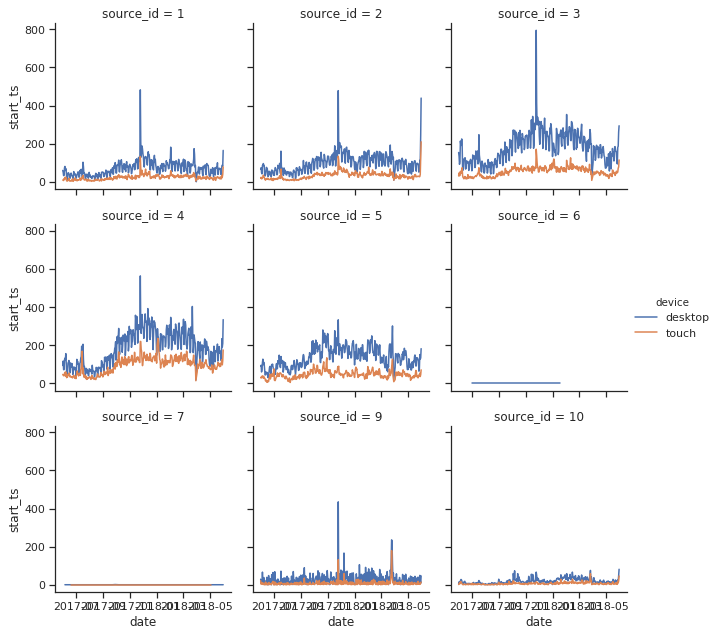

In [40]:
sessions_grouped = visits.groupby(by =['date','source_id','device'])['start_ts'].count().reset_index()

sns.set(style='ticks')
g = sns.FacetGrid(sessions_grouped, col = 'source_id',  hue='device', col_wrap=3)
g.map(plt.plot, "date", "start_ts")
g.add_legend()
plt.show()

In [41]:
session_per_user = visits['start_ts'].count() / visits['uid'].nunique()
session_per_user.round(1)

1.6

Среднее количество сессий в день - 987. На desktop приходится 73% всех сессий. В среднем на 1 пользователя приходится 1,6 сессия - есть пользователи, которые заходят более одного раза. Графики количества сессий в динамике в разрезе по платформам и источникам повторяют графики DAU: наиболее активный период в сентября по апрель и пик в конце ноября.

<b>3. Найдем среднюю длину сессии

In [42]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].mean().round()

644.0

Средняя длина сессии составляет 644 секунды. Построим гистограмму и посмотрим распределение длины сессии.

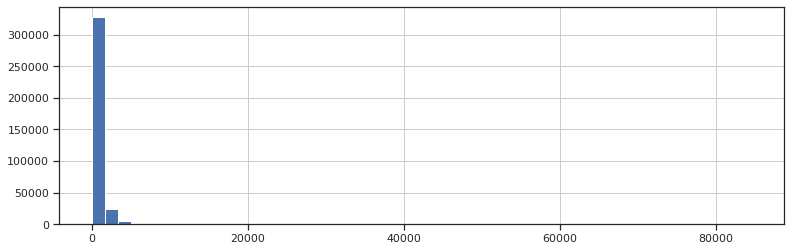

In [43]:
visits['session_duration_sec'].hist(bins=50,figsize=(13,4))

Как видим на гистограмме, имеются очень большие хвосты, а наиболее частая длина сессии не превышает 1000. Сделает срез и построим boxplot для наглядности.

In [44]:
visits_query = visits[visits['session_duration_sec'] < 1000]

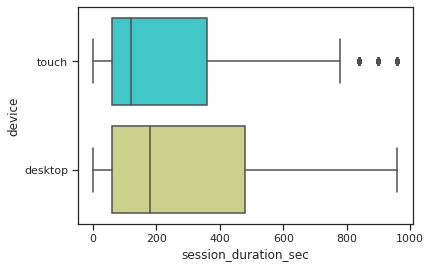

In [45]:
sns.boxplot(data=visits_query, x='session_duration_sec', y='device', palette='rainbow', orient='h')
plt.show()

С учетом того, что распределение длины сессии не является нормальным и есть очень большие хвосты, то посчитаем моду - наиболее часто встречающуюся длину сессии.

In [46]:
visits['session_duration_sec'].mode() 

0    60
dtype: int64

Выведем на графике среднюю длину сессии в динамике в разрезе по платформам и источникам.

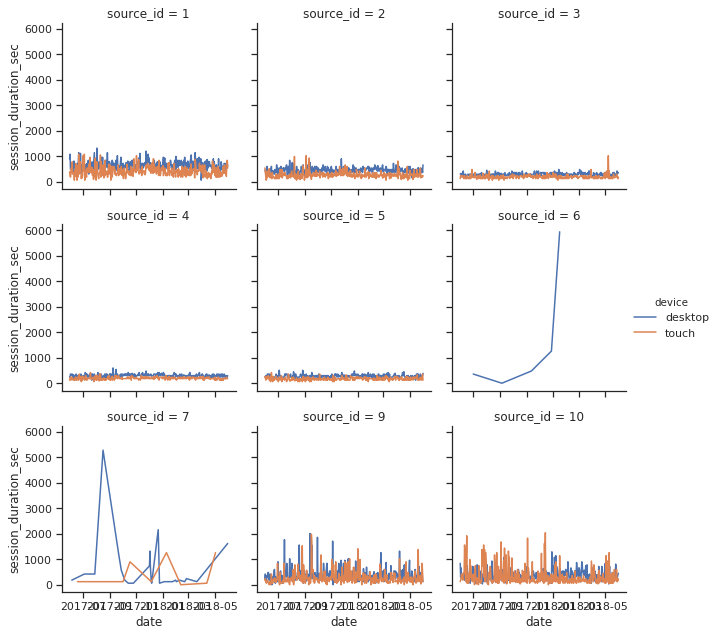

In [47]:
asl_grouped = visits.groupby(by =['date','source_id','device'])['session_duration_sec'].median().reset_index()

sns.set(style='ticks')
g = sns.FacetGrid(asl_grouped, col = 'source_id',  hue='device', col_wrap=3)
g.map(plt.plot, "date", "session_duration_sec")
g.add_legend()
plt.show()

Распределение длины сессии не является нормальным, существуют большие выбросы. Поэтому была рассчитана наиболее часто встречающаяся длина сессии - мода, и она составляет 60 секунд. В разрезе по платформам и источникам наиболее странно выглядит источник 6 и 7 -  динамика средней длины сессии показывает слишком сильные перепады, но это обусловлено малым количеством пользователей, пришедших из данных источников.

<b>4. Посчитаем ретеншн

In [48]:
visits['date'] = pd.to_datetime(visits['date'])

In [49]:
first_activity_date = visits.groupby(['uid'])['date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,weekday,year_month,year_month_week,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2,2017-12,2017-12-18/2017-12-24,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,0,2018-02,2018-02-19/2018-02-25,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,5,2017-07,2017-06-26/2017-07-02,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,6,2018-05,2018-05-14/2018-05-20,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2,2017-12,2017-12-25/2017-12-31,0,2017-12-27


In [50]:
visits['first_visit_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['cohort_lifetime_m'] = visits['start_ts'] - visits['first_visit_month']
visits['cohort_lifetime_m'] = visits['cohort_lifetime_m'] / np.timedelta64(1,'M')
visits['cohort_lifetime_m'] = visits['cohort_lifetime_m'].astype(int)
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,weekday,year_month,year_month_week,session_duration_sec,first_activity_date,first_visit_month,cohort_lifetime_m
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2,2017-12,2017-12-18/2017-12-24,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,0,2018-02,2018-02-19/2018-02-25,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,5,2017-07,2017-06-26/2017-07-02,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,6,2018-05,2018-05-14/2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2,2017-12,2017-12-25/2017-12-31,0,2017-12-27,2017-12-01,0


In [51]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime_m']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_visit_month,cohort_lifetime_m,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1030
2,2017-06-01,2,687
3,2017-06-01,3,834
4,2017-06-01,4,899
...,...,...,...
77,2018-04-01,0,15709
78,2018-04-01,1,751
79,2018-04-01,2,4
80,2018-05-01,0,14207


In [52]:
initial_users_count = cohorts[cohorts['cohort_lifetime_m'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count 

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,12856
24,2017-08-01,9749
34,2017-09-01,16704
43,2017-10-01,25256
51,2017-11-01,27248
58,2017-12-01,24882
64,2018-01-01,21945
69,2018-02-01,22197
73,2018-03-01,20588


In [53]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

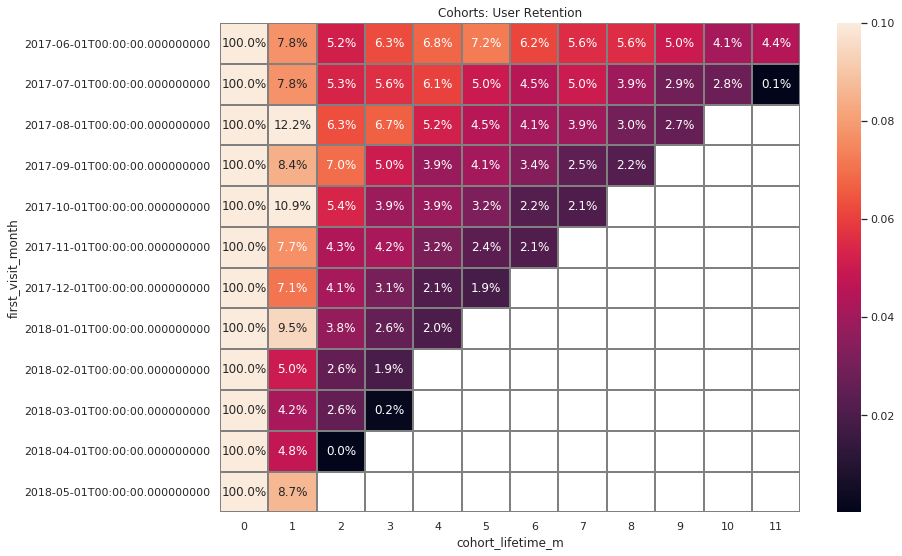

In [54]:
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime_m',values='retention',aggfunc='sum') 
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1); 

Retention Rate в первый месяц варьируется от 4,2% до 12,2%. Это значит, что такое количество пользователей вернулись на Яндекс.Афишу в следующий после первого визита месяц, что в целом довольно низкий показатель. Выше всего он по когортам, пришедшим в августе, октябре и феврале. Ниже всего у пользователей, пришедших в марте и апреле. Кроме того, ввиду таких перепадов можно сделать вывод, что коэффициент удержания низкий. Пользователи, которые вернулись во второй месяц, практически по всем когортам продолжают пользоваться сервисом в дальнейшем. Таким образом, необходимо работать над удержанием пользователей в первый месяц, чтобы в последующем повысить Retention Rate остальных месяцев.

### Вывод

<p>Пользователи не очень регулярно используют сервис - об этом свидетельствуют sticky_factor_mau (около 4%) и Retention Rate в первый месяц (от 4,2% до 12,2%). Рост сессий наблюдался с сентября и динамика сохранялась по апрель месяц. Наибольший пик по посещениям отмечен в конце ноября. Среднее количество сессий в день - 987. На desktop приходится 73% всех сессий. В среднем на 1 пользователя приходится 1,6 сессия - есть пользователи, которые заходят более одного раза. Распределение длины сессии не является нормальным, существуют большие выбросы. Поэтому была рассчитана наиболее часто встречающаяся длина сессии - мода, и она составляет 60 секунд.</p>
<p>Сервису необходимо больше работать над удержанием пользователей, а также более детально изучить причины нежелания использовать сервис в дальнейшем. Возможно, им не понятна навигация или есть определенные трудности с использованием.</p>


### 2.2. Продажи
1. Когда люди начинают покупать?
2. Сколько раз покупают за период?
3. Какой средний чек?
4. Сколько денег приносят? (LTV)

Посмотрим, сколько времени проходит от начала первой сессии до первой покупки, а также вредний чек пользователя по платформам.

In [55]:
orders = orders.join(visits.sort_values(by='start_ts').groupby('uid').agg({'source_id': 'first', 'device': 'first', 'start_ts': 'min'}), on='uid', how='inner')
orders.head()

,buy_ts,revenue,uid,source_id,device,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00


In [56]:
first_visit_date_by_customers = orders.groupby('uid')['start_ts'].min()
first_visit_date_by_customers.name = 'first_visit_date'
orders = orders.join(first_visit_date_by_customers,on='uid')
orders['first_visit_month'] = orders['first_visit_date'].astype('datetime64[M]')
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,source_id,device,start_ts,first_visit_date,first_visit_month,orders_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00,2017-06-01 07:31:00,2017-06-01,2017-06-01


In [57]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

orders.head()

,buy_ts,revenue,uid,source_id,device,start_ts,first_visit_date,first_visit_month,orders_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [58]:
orders['time_to_orders'] = (orders['first_order_date'] - orders['first_visit_date']) / pd.Timedelta(minutes=1)
orders['time_to_orders'].head()

0     1.0
1    11.0
2     2.0
3    15.0
4    27.0
Name: time_to_orders, dtype: float64

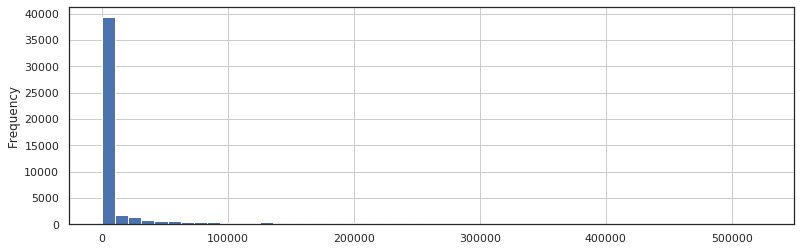

In [59]:
plt.show()

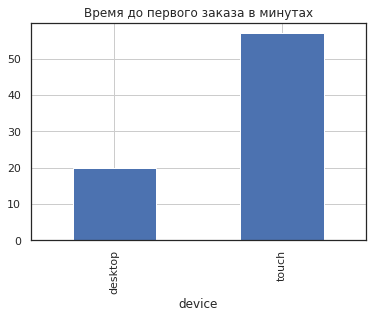

In [60]:
orders_device_time = orders.groupby('device')['time_to_orders'].median().plot(
    kind='bar', grid=True, title=('Время до первого заказа в минутах'))

Как видим среднее время от начала первой сессии до первой покупки по desktop (около 20 минут) значительно меньше, чем по touch (более 50 минут). Это говорит о том, что пользователи быстрее совершают покупку через desktop. Возможно, в функционале touch не совсем понятна навигация, как совершать покупку.

Посмотрим, какое количество покупок было совершено за анализируемый период.

In [61]:
orders['buy_ts'].count()

50415

Посмотрим, какое количество покупок было совершено в разрезе по месяцам.

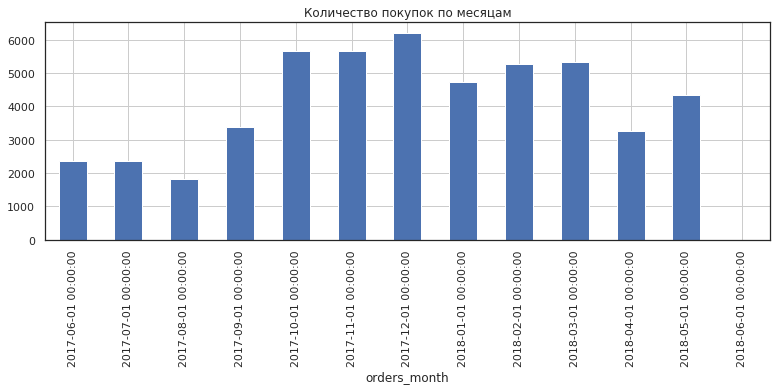

In [62]:
orders.groupby('orders_month')['buy_ts'].count().plot(kind='bar', figsize=(13,4), grid=True, title='Количество покупок по месяцам')
plt.show()

In [63]:
orders.groupby('orders_month')['buy_ts'].count().median()

4346.0

Всего за анализируемый период было совершено 50 415 покупок, в среднем на каждый месяц приходилось по 4346. Наиболее продажные месяцы были в период с октября 2017 по март 2018.

In [64]:
orders['revenue'].mean().round(2)

5.0

Средний чек составляет - 5.

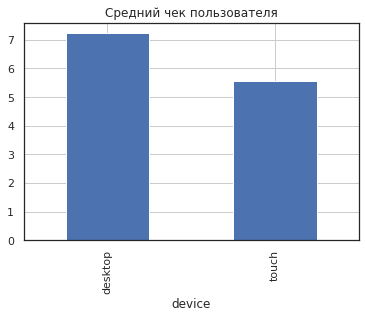

In [65]:
orders_device_revenue = orders.groupby('device').agg({'revenue':'sum','uid':'nunique'})
orders_device_revenue['revenue_per_user'] = orders_device_revenue['revenue'] / orders_device_revenue['uid']
orders_device_revenue['revenue_per_user'].plot(kind='bar', grid=True, title='Средний чек пользователя')
plt.show()

Как видим на графике выше, средний чек пользователя desktop выше, чем пользователя touch.

Посмотрим на средний чек пользователя в разрезе по когортам: в зависимости от первого заказа и в зависимости от первого посещения.

In [66]:
#Сформируем когорту в зависимости от первого заказа
orders_grouped_by_cohorts = orders.groupby(['first_order_month','orders_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts.head() 

revenue   uid
first_order_month orders_month               
2017-06-01        2017-06-01    9557.49  2023
                  2017-07-01     981.82    61
                  2017-08-01     885.34    50
                  2017-09-01    1931.30    54
                  2017-10-01    2068.58    88

In [67]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'] 
orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_order_month orders_month                                 
2017-06-01        2017-06-01    9557.49  2023          4.724414
                  2017-07-01     981.82    61         16.095410
                  2017-08-01     885.34    50         17.706800
                  2017-09-01    1931.30    54         35.764815
                  2017-10-01    2068.58    88         23.506591

In [68]:
revenue_per_user_order = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='orders_month',values='revenue_per_user',aggfunc='mean')
revenue_per_user_order

orders_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


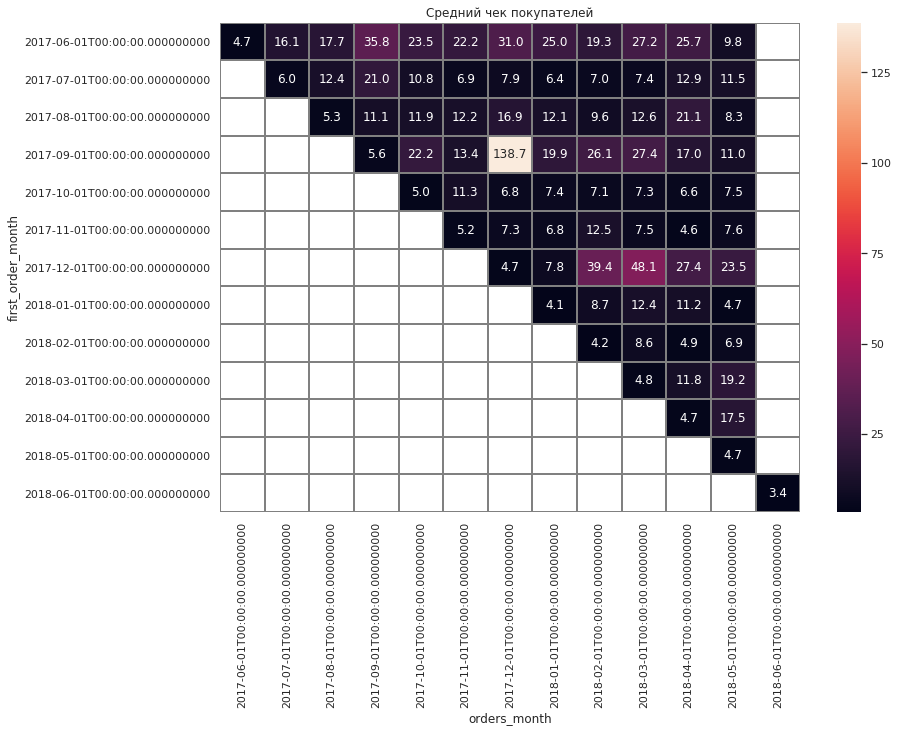

In [69]:
plt.figure(figsize=(13, 9))
plt.title('Средний чек покупателей')
sns.heatmap(revenue_per_user_order, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

Как видим, средний чек пользователя, который совершил покупку и вернулся на следующий месяц, выше, чем в момент первой покупки. Также наиболее высокий средний чек по когортам пользователей на второй третий месяц, которые совершили первую покупку в июне, сентябре и декабре.

In [70]:
#Сформируем когорту в зависимости от первого визита
orders_grouped_by_cohorts_2 = orders.groupby(['first_visit_month','orders_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts_2.head() 

revenue   uid
first_visit_month orders_month               
2017-06-01        2017-06-01    9557.49  2023
                  2017-07-01    2664.58   231
                  2017-08-01    1464.69   129
                  2017-09-01    3882.09   188
                  2017-10-01    3940.59   257

In [71]:
orders_grouped_by_cohorts_2['revenue_per_user'] = orders_grouped_by_cohorts_2['revenue'] / orders_grouped_by_cohorts_2['uid'] 
orders_grouped_by_cohorts_2.head()

revenue   uid  revenue_per_user
first_visit_month orders_month                                 
2017-06-01        2017-06-01    9557.49  2023          4.724414
                  2017-07-01    2664.58   231         11.534978
                  2017-08-01    1464.69   129         11.354186
                  2017-09-01    3882.09   188         20.649415
                  2017-10-01    3940.59   257         15.333035

In [72]:
orders_grouped_by_cohorts_2 = orders_grouped_by_cohorts_2.reset_index()
orders_grouped_by_cohorts_2['cohort_lifetime'] = orders_grouped_by_cohorts_2['orders_month'] - orders_grouped_by_cohorts_2['first_visit_month']
orders_grouped_by_cohorts_2['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [73]:
orders_grouped_by_cohorts_2['cohort_lifetime'] = orders_grouped_by_cohorts_2['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts_2['cohort_lifetime'].head()

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64

In [74]:
orders_grouped_by_cohorts_2['cohort_lifetime'] = orders_grouped_by_cohorts_2['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts_2[['first_visit_month','orders_month','cohort_lifetime']].head()

,first_visit_month,orders_month,cohort_lifetime
0,2017-06-01,2017-06-01,0
1,2017-06-01,2017-07-01,1
2,2017-06-01,2017-08-01,2
3,2017-06-01,2017-09-01,3
4,2017-06-01,2017-10-01,4


In [75]:
revenue_per_user_pivot = orders_grouped_by_cohorts_2.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,4.724414,11.534978,11.354186,20.649415,15.333035,13.913695,18.465344,14.650387,13.476221,22.318205,19.333421,11.543772
2017-07-01,5.633137,7.846519,7.442282,6.382857,5.535882,6.000602,4.819672,6.017969,6.300174,8.208750,6.228800,NaN
2017-08-01,5.161267,6.393077,7.256159,8.087265,7.864466,7.011842,6.403289,14.491047,15.672453,6.477931,NaN,NaN
2017-09-01,5.475055,10.138301,8.757801,58.645674,11.607928,13.643214,6.906000,7.121449,4.500753,NaN,NaN,NaN
2017-10-01,4.882297,8.003845,4.544589,5.370812,5.270051,5.775085,4.990603,5.332520,NaN,NaN,NaN,NaN
2017-11-01,4.924573,4.797806,5.105894,7.483770,5.516119,6.492018,5.415504,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.828702,5.269788,22.213228,27.400107,16.753678,14.372016,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.007946,6.099063,6.655771,3.871899,5.860778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.036687,7.062135,6.698889,8.500094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


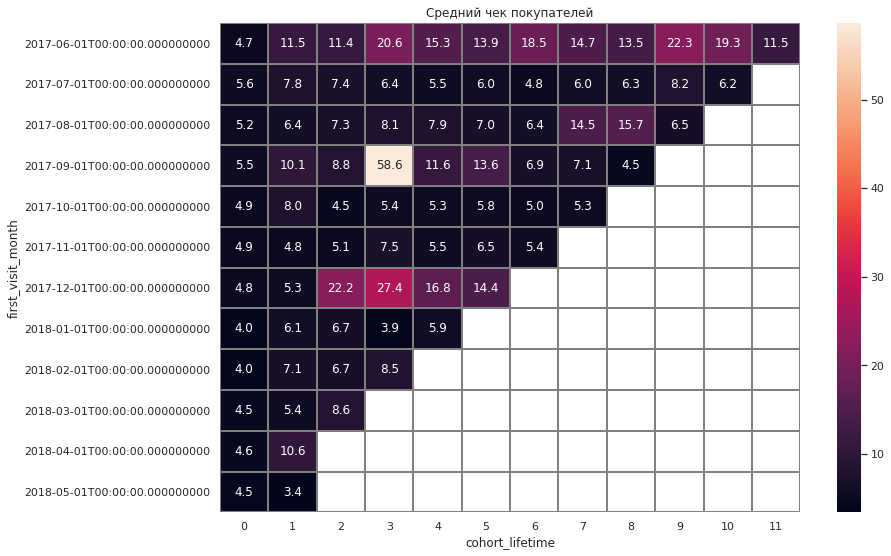

In [76]:
plt.figure(figsize=(13, 9))
plt.title('Средний чек покупателей')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 

Как видим, практически по всем когортам на следующий месяц после первого визита средний чек пользователя выше. Наиболее отличаются когорты, которые пришли впервые в июне, сентябре и декабре - средний чек данных пользователей по всем месяцам выше, чем по остальным когортам.

Посчитаем LTV для всех пользователей, а также в разрезе по платформам, посмотрим на ltv первой когорты. Для этого создадим фукнцию ltv.

In [77]:
orders.head()

,buy_ts,revenue,uid,source_id,device,start_ts,first_visit_date,first_visit_month,orders_month,first_order_date,first_order_month,time_to_orders
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,desktop,2017-06-01 00:09:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,desktop,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,desktop,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,desktop,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,desktop,2017-06-01 07:31:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,27.0


In [78]:
def ltv(data):
    cohort_sizes = data.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    cohorts_ltv = data.groupby(['first_order_month','orders_month']).agg({'revenue': 'sum'}).reset_index()
    report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
    margin_rate = 1
    report['gp'] = report['revenue'] * margin_rate
    report['age'] = (report['orders_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']
    output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')    
    output = output.fillna('')
    print('LTV первой когорты', output.loc['2017-06-01'].sum().round(1))
    return output

In [79]:
ltv(orders)

LTV первой когорты 11.9


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.02253,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09-01,5.644529,1.11759,0.52093,3.97579,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.0848157,0.11547,,,,
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12-01,4.738191,0.260374,0.925097,1.06527,0.31293,0.338047,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.0626979,,,,,,,
2018-02-01,4.156987,0.278274,0.0785155,0.0741441,,,,,,,,


In [80]:
orders_desktop = orders[orders['device'] == 'desktop']
orders_touch = orders[orders['device'] == 'touch']

In [81]:
ltv(orders_desktop)

LTV первой когорты 13.1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.889172,0.518467,0.496298,1.11932,1.1709,0.866504,1.12203,0.686974,0.64859,0.69067,0.666804,0.255752
2017-07-01,6.139817,0.366527,0.770852,0.323899,0.177418,0.160301,0.136507,0.14538,0.183945,0.1604,0.164089,
2017-08-01,5.255449,0.55018,0.519919,0.447989,0.592496,0.290844,0.228025,0.471616,0.346311,0.21009,,
2017-09-01,5.797504,0.926634,0.413992,4.85504,0.482424,0.764167,0.525386,0.236013,0.218723,,,
2017-10-01,5.130374,0.559994,0.20818,0.180235,0.156087,0.140631,0.0988109,0.128281,,,,
2017-11-01,4.996515,0.447435,0.230544,0.379035,0.162432,0.0598948,0.134639,,,,,
2017-12-01,4.881767,0.282688,1.14158,1.3202,0.388722,0.415979,,,,,,
2018-01-01,4.210019,0.343362,0.362221,0.162319,0.0714286,,,,,,,
2018-02-01,4.188536,0.315447,0.0912789,0.090057,,,,,,,,


In [82]:
ltv(orders_touch)

LTV первой когорты 5.2


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,3.850841,0.309626,0.126604,0.0816511,0.235857,0.0409034,0.0406542,0.0228349,0.0475078,0.155732,0.0646729,0.26271
2017-07-01,5.512065,0.214836,0.0572544,0.493804,0.174383,0.139698,0.0575567,0.128136,0.0739295,0.0961965,0.123325,
2017-08-01,5.368203,0.131758,0.191133,0.144492,0.0656641,0.251758,0.135117,0.115156,0.0567969,0.0917578,,
2017-09-01,5.041130,1.87079,0.942739,0.507663,0.0776437,0.185172,1.3967,0.271303,0.047069,,,
2017-10-01,4.450149,0.429839,0.11802,0.0562129,0.13177,0.0317574,0.0236386,0.0594678,,,,
2017-11-01,5.851457,0.186887,0.0630464,0.086702,0.0844901,0.0273775,0.0280927,,,,,
2017-12-01,4.171501,0.172302,0.0706546,0.0590971,0.013781,0.0304515,,,,,,
2018-01-01,3.851087,0.108827,0.0826323,0.0680258,0.029299,,,,,,,
2018-02-01,4.052062,0.154645,0.0360664,0.0212204,,,,,,,,


Средний первой когорты LTV для всех пользователей составляет 11.9, desktop - 13.1, touch - 5.2. Как видим, пользователи, которые используют desktop приносят больше денег сервису.

### Вывод

Среднее время от начала первой сессии до первой покупки по desktop составляет около 20 минут, по touch - более 50 минут. Это говорит о том, что пользователи быстрее совершают покупку через desktop. Возможно, в функционале touch не совсем понятна навигация, как совершать покупку. Средний чек пользователя desktop выше, чем пользователя touch (7.1 и 5.5 соответственно). Средний чек пользователя, который совершил покупку и вернулся на следующий месяц, выше, чем в момент первой покупки. Практически по всем когортам на следующий месяц после первого визита средний чек пользователя выше. Наиболее отличаются в положительную сторону когорты, которые пришли впервые в июне, сентябре и декабре. Средний LTV пользователей, которые используют desktop выше, чем у тех, кто использует touch.

LTV первой когорты 5.2


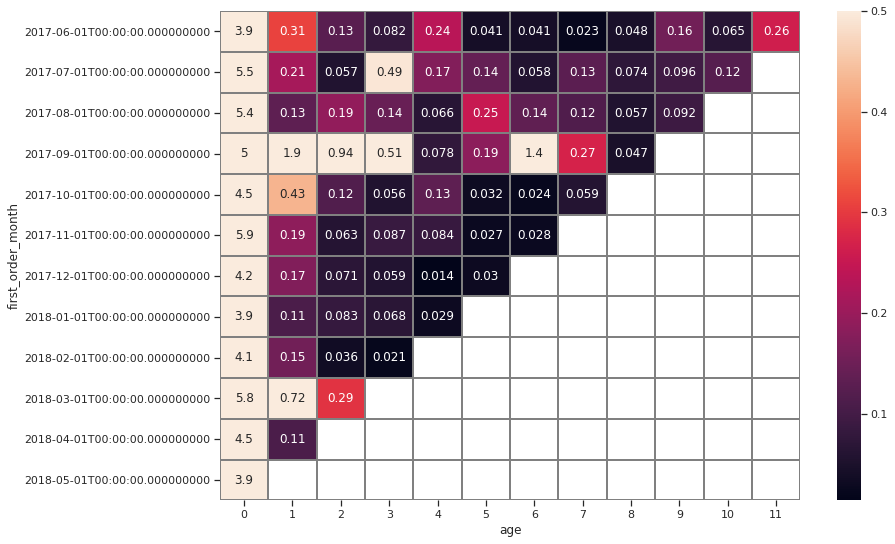

In [112]:
plt.figure(figsize=(13, 9))
sns.heatmap(ltv(orders_touch).replace('', np.nan), annot=True, linewidths=1, linecolor='gray', vmax=0.5); 

### 2.3. Маркетинг
1. Сколько денег потратили? Всего / на каждый источник / по времени
2. Сколько стоило привлечение одного покупателя из каждого источника?
3. На сколько окупились расходы? (ROI)

Проанализируем, сколько потратили денег всего, какой период и какой источник оказались наиболее затратными, а также динамину затрат по каждому источнику.

In [83]:
costs.head()
costs['month'] = costs['dt'].astype('datetime64[M]')

In [84]:
costs['costs'].sum()

329131.62

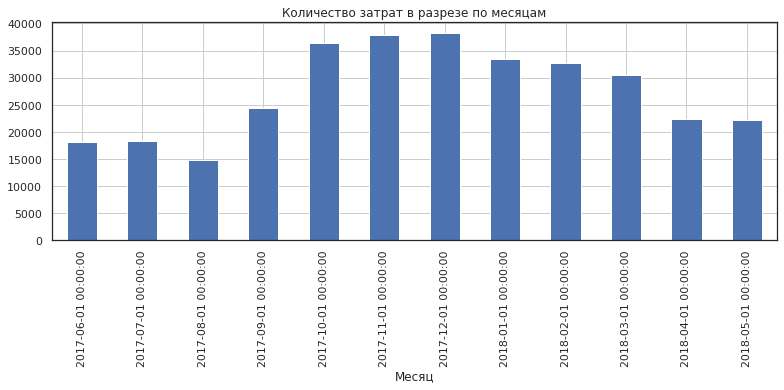

In [85]:
costs_by_month = costs.groupby('month')['costs'].sum()
cm = costs_by_month.plot(kind='bar', grid=True, figsize=(13,4), title='Количество затрат в разрезе по месяцам')
cm.set_xlabel('Месяц')
plt.show()

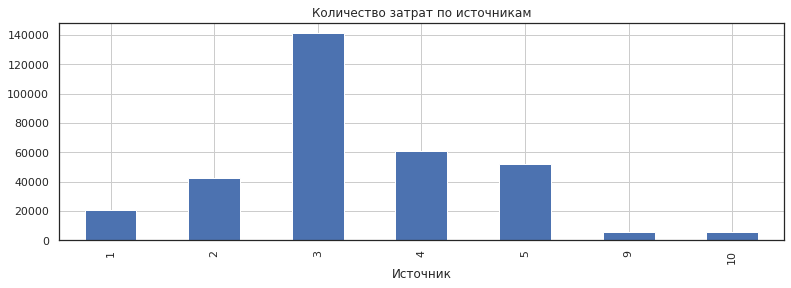

In [86]:
costs_by_source = costs.groupby('source_id')['costs'].sum()
cs = costs_by_source.plot(kind='bar', grid=True, figsize=(13,4), title='Количество затрат по источникам')
cs.set_xlabel('Источник')
plt.show()

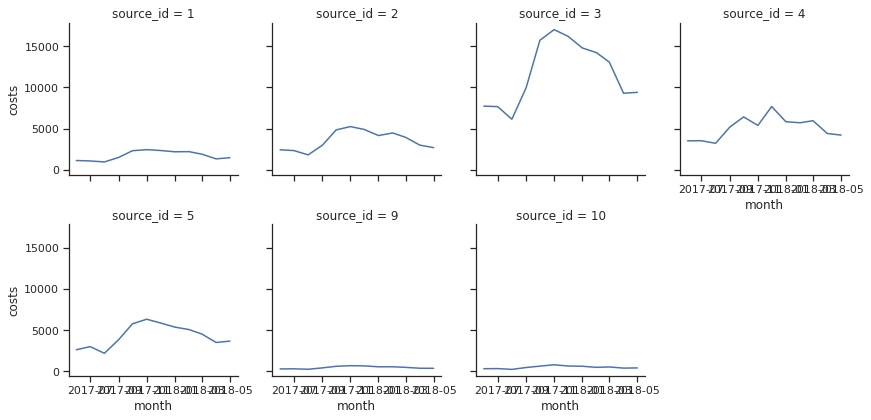

In [87]:
costs_grouped = costs.groupby(by =['month','source_id'])['costs'].sum().reset_index()

sns.set(style='ticks')
g = sns.FacetGrid(costs_grouped, col = 'source_id', col_wrap=4)
g.map(plt.plot, "month", "costs")
g.add_legend()

Как видно на графиках, наиболее затратным периодом являлся период с сентября по декабрь - затраты увеличивались. Начиная с января по апрель затраты немного уменьшались. Это может быть обусловлено сезонностью мероприятий, когда реклама размещалась чаще, чтобы привлекать пользователей.

Посмотрим, сколько стоило привлечение одного пользователя из каждого источника.

In [88]:
buyers_by_source = orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
buyers_by_source.columns = ['source_id', 'n_buyers']
buyers_by_source

,source_id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [89]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'costs']
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [90]:
cac_by_source = buyers_by_source.merge(costs_by_source, on='source_id')
cac_by_source['cac'] = cac_by_source['costs'] / cac_by_source ['n_buyers']
cac_by_source

,source_id,n_buyers,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10296,61073.60,5.931779
4,5,6931,51757.10,7.467479
5,9,1088,5517.49,5.071222
6,10,1329,5822.49,4.381106


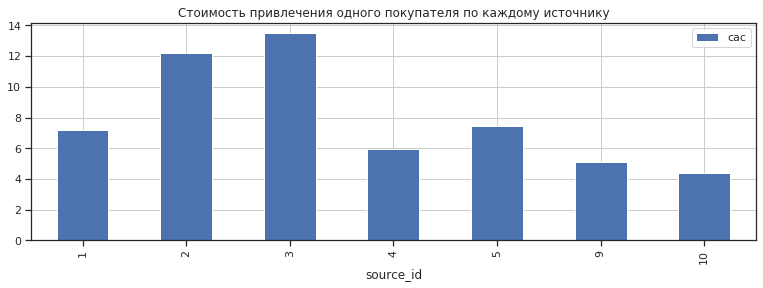

In [91]:
cacs = cac_by_source.plot(kind='bar', x='source_id', y='cac', grid=True, figsize=(13,4),
                         title='Стоимость привлечения одного покупателя по каждому источнику')
plt.show()

Как видно, наиболее дорогими источниками с точки зрения стоимости привлечения одного покупателя являются 2 и 3 (12.2 и 13.5 соответственно), в то время как по остальным источникам данный показатель не превышает 7.5. Самый дешевый - 10 (4.4)

Посчитаем ROI по источникам и общий.

In [92]:
revenue_by_source = orders.groupby('source_id').agg({'revenue': 'sum'}).reset_index()
revenue_by_source.columns = ['source_id', 'revenue']
revenue_by_source

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [93]:
roi_by_source = revenue_by_source.merge(costs_by_source, on='source_id', how='outer')
roi_by_source

,source_id,revenue,costs
0,1,31090.55,20833.27
1,2,46923.61,42806.04
2,3,54511.24,141321.63
3,4,56696.83,61073.60
4,5,52624.02,51757.10
5,7,1.22,NaN
6,9,5759.40,5517.49
7,10,4450.33,5822.49


In [94]:
roi_by_source['roi'] = (roi_by_source['revenue'] - roi_by_source['costs']) / roi_by_source['costs']
roi_by_source

,source_id,revenue,costs,roi
0,1,31090.55,20833.27,0.492351
1,2,46923.61,42806.04,0.096191
2,3,54511.24,141321.63,-0.614275
3,4,56696.83,61073.60,-0.071664
4,5,52624.02,51757.10,0.016750
5,7,1.22,NaN,NaN
6,9,5759.40,5517.49,0.043844
7,10,4450.33,5822.49,-0.235665


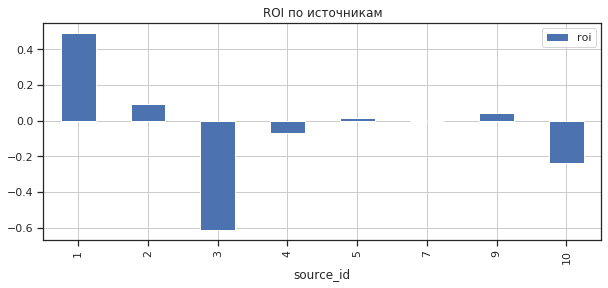

In [95]:
roi_by_source.plot(x='source_id', y='roi', kind='bar', grid=True, figsize=(10,4), title='ROI по источникам')
plt.show()

Как видно на графике, расходы окупились только по 4 источникам (1, 2, 5 и 9), наиболее затратным и неокупившимся источником стал 3. 

In [96]:
roi_total = (roi_by_source['revenue'].sum() - roi_by_source['costs'].sum()) / roi_by_source['costs'].sum()
print('Общий показатель ROI по всем источникам:', roi_total.round(2))

Общий показатель ROI по всем источникам: -0.23


В целом затраты по источникам не окупились. Необходимо пересмотреть и перераспределить расходы с наиболее убыточных в пользу наиболее прибыльных.

In [97]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohorts_ltv = orders.groupby(['first_order_month','orders_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['orders_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.02253,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09-01,5.644529,1.11759,0.52093,3.97579,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.0848157,0.11547,,,,
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12-01,4.738191,0.260374,0.925097,1.06527,0.31293,0.338047,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.0626979,,,,,,,
2018-02-01,4.156987,0.278274,0.0785155,0.0741441,,,,,,,,


In [98]:
print('LTV первой когорты', output.loc['2017-06-01'].sum().round(1))

LTV первой когорты 11.9


In [99]:
# отфильруем нужную когорту
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# посчитаем расходы за этот месяц
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.905091448344043
LTV = 11.879233811171527


Стоимость привлечения одного покупателя составила 8.9, а валовая прибыль - 11.9. Таким образом, вложения в привлечение покупателей окупились.

In [100]:
# считаем расходы за месяц
monthly_costs = costs.groupby('month').sum()
monthly_costs

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88
2017-11-01,1020,37907.88
2017-12-01,1054,38315.35
2018-01-01,1054,33518.52
2018-02-01,952,32723.03


In [101]:
#Добавим данные о расходах в отчёт и посчитаем CAC
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,orders_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,1020,18015.0,8.905091


In [102]:
report_new['roi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='roi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [103]:
output.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем когорты окупаются к 8му месяцу.

### Вывод

Общие затраты за период по всем источникам составили 329131.62. 
Наиболее затратным периодом являлся период с сентября по декабрь. Начиная с января по апрель затраты немного уменьшались. Это может быть обусловлено сезонностью мероприятий, когда реклама размещалась чаще, чтобы привлекать пользователей. наиболее дорогими источниками с точки зрения стоимости привлечения одного покупателя являются 2 и 3. Самый дешевый - 10.
В целом затраты по источникам не окупились. Необходимо пересмотреть и перераспределить расходы с наиболее убыточных в пользу наиболее прибыльных.

## Шаг 3. Общий вывод

1. В месяц сервис посещают 23.2 тыс. пользователей, в неделю - 5.7 тыс., ежедневно - 908 пользователей.
2. Пользователи не очень регулярно используют сервис Яндекс.Афиша о чем свидетельствует низкое значение sticky_factor_mau (около 4%) и Retention Rate первого месяца (от 4,2% до 12,2%).
3. Наибольший пик по посещениям отмечен в конце ноября и он актуален для обеих платформ и практически для всех источников. 
4. Среднее количество сессий в день - 987. На desktop приходится 73% всех сессий. В среднем на 1 пользователя приходится 1.6 сессия. 
5. Наиболее часто встречающаяся длина сессии - мода, и она составляет 60 секунд.
6. Среднее время от начала первой сессии до первой покупки по desktop составляет около 20 минут, по touch - более 50 минут.
7. Средний чек пользователя desktop выше, чем пользователя touch.
8. Средний чек пользователя, который совершил покупку и вернулся на следующий месяц, выше, чем в момент первой покупки. 
9. Практически по всем когортам на следующий месяц после первого визита средний чек пользователя выше. 
10. Наиболее отличаются в положительную сторону когорты, которые пришли впервые в июне, сентябре и декабре. Средний LTV пользователей, которые используют desktop выше, чем у тех, кто использует touch.
11. Наиболее затратным периодом являлся период с сентября по декабрь.
12. Наиболее дорогими источниками с точки зрения стоимости привлечения одного покупателя являются 2 и 3. Самый дешевый - 10.
13. В целом затраты по источникам не окупились. 
<br><p>Из всех перечисленных пунктов выше следует, что основная аудитория приходит с платформы desktop, кроме того пользователи на данной платформе быстрее совершают заказ с момента первой сессии, их средний чек больше и LTV также больше, чем у пользователей touch. Рекомендуется изучить, почему пользователи не соверашют заказы на touch: возможно им плохо понятна навигация, есть какие-либо проблемы с отображением или другие технические сложности. Если же нет, то рекомендуется сделать приоритет в пользу пользователей, которые используют desktop, потому что они приносят наибольшую выгоду сервису.</p>
<p>Кроме того, следует обратить внимание на удержание пользователей в приложении. Retention Rate и sticky_factor_mau свидетельствуют, что только до 12% пользователей возвращается на следующий месяц. Вместе с тем, средний чек пользователя увеличивается именно со 2-3 месяца. Таким образом, удержание пользователей позволит повысить revenue.</p>
<p>Также рекомендуется перераспределить затраты между источниками и отдать предпочтение в пользу наиболее прибыльных, а именно источник 1 и отказаться от 3 - он явялется самым дорогим с точки зрения привлечения одного покупателя и самым неокупаемым</p>